In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 475.2 MB 763 kB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 666 kB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 763 kB/s eta 0:00:01
     |████████████████████████████████| 294 kB 633 kB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 764 kB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 22.9 MB 693 kB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 441 kB 401 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 683 kB/s eta 0:00:01
     |████████████████████████████████| 130 kB 661 kB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 1.7 MB 775 kB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 515 kB/s eta 0

In [5]:
import tensorflow 
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras .utils import to_categorical

In [7]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images,test_images=train_images/255.0,test_images/255.0

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

model=models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5)

test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test accuracy:{test_acc}")
predictions=model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.2924 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 2s 810us/step - loss: 0.1412 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 2s 811us/step - loss: 0.1046 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.0864 - accuracy: 0.9730
Epoch 5/5
313/313 [==============================] - 0s 537us/step - loss: 0.0721 - accuracy: 0.9780
Test accuracy:0.9779999852180481
313/313 [==============================] - 0s 491us/step


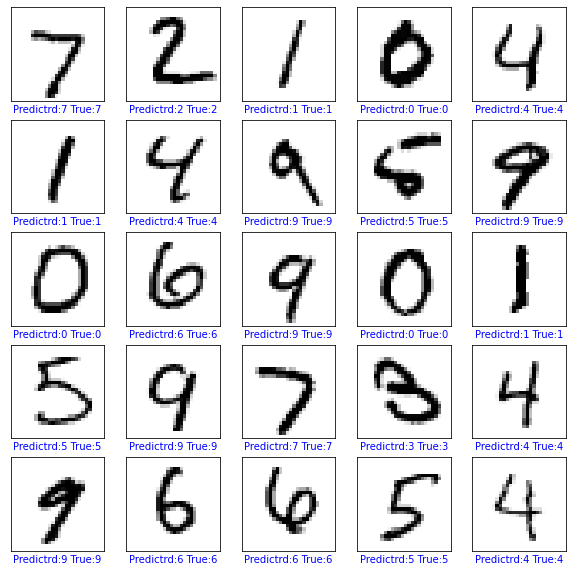

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(' ')
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_label=predictions[i].argmax()
    true_label=test_labels[i].argmax()
    color='blue' if predicted_label==true_label else 'red'
    plt.xlabel(f"Predictrd:{predicted_label} True:{true_label}",color=color)
plt.show()